# Student Explanation Classification


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


In [3]:
# 🧹 Data Preprocessing
train.dropna(subset=['StudentExplanation', 'MC_Answer', 'Category'], inplace=True)
X = train[['MC_Answer', 'StudentExplanation']]
y = train['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


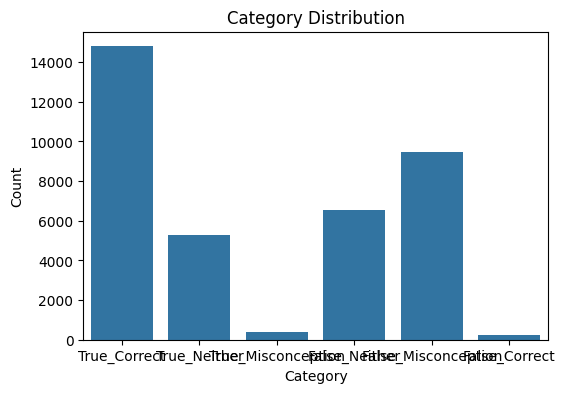

In [4]:
# 📊 Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [5]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(), 'StudentExplanation'),
    ('mc', OneHotEncoder(), 'MC_Answer')
])

In [6]:
# 🤖 Define Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [7]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [8]:
# 🏁 Train & Evaluate Models
results = {}
for name, model in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_val, y_val)
    results[name] = score
    print(f"\nModel: {name}")
    y_pred = pipe.predict(X_val)
    print(classification_report(y_val, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=model.classes_ if hasattr(model, 'classes_') else None).plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
import joblib

# Save best performing model
best_model = best_models['Random Forest']
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved!")


Model and vectorizer saved!


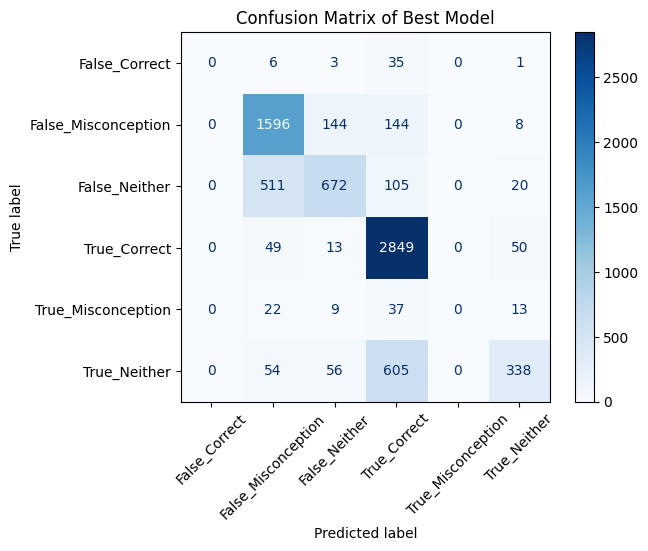

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = best_model.predict(X_test_vec)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=le.classes_, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix of Best Model")
plt.show()


In [27]:
import joblib
import json

# Load model and vectorizer
model = joblib.load("best_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")  # or "tfidf_vectorizer.pkl" if you saved it with that name

# Load label mapping
with open("label_mapping.json", "r") as f:
    label_mapping = json.load(f)

# Invert the mapping to get label index -> label name
inv_label_mapping = {int(v): k for v, k in label_mapping.items()}

# Example explanations
new_explanations = [
    "The sun revolves around the earth.",
    "Plants absorb food from the soil through roots.",
    "Objects fall faster if they are heavier.",
]

# Transform input
X_new = vectorizer.transform(new_explanations)

# Predict
preds = model.predict(X_new)

# Get readable labels
predicted_labels = [inv_label_mapping[p] for p in preds]

# Show predictions
for i, explanation in enumerate(new_explanations):
    print(f"Explanation: {explanation}")
    print(f"Predicted Misconception: {predicted_labels[i]}\n")


Explanation: The sun revolves around the earth.
Predicted Misconception: Base_rate

Explanation: Plants absorb food from the soil through roots.
Predicted Misconception: Adding_terms

Explanation: Objects fall faster if they are heavier.
Predicted Misconception: Adding_terms



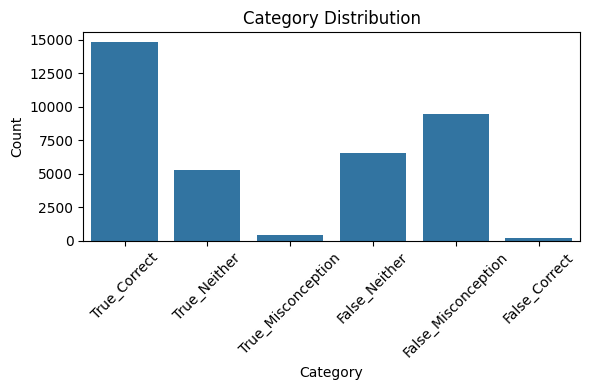


Model: Logistic Regression
                     precision    recall  f1-score   support

      False_Correct       0.77      0.22      0.34        45
False_Misconception       0.77      0.86      0.81      1892
      False_Neither       0.75      0.61      0.67      1308
       True_Correct       0.83      0.94      0.88      2961
 True_Misconception       0.94      0.19      0.31        81
       True_Neither       0.69      0.53      0.60      1053

           accuracy                           0.79      7340
          macro avg       0.79      0.56      0.60      7340
       weighted avg       0.78      0.79      0.78      7340



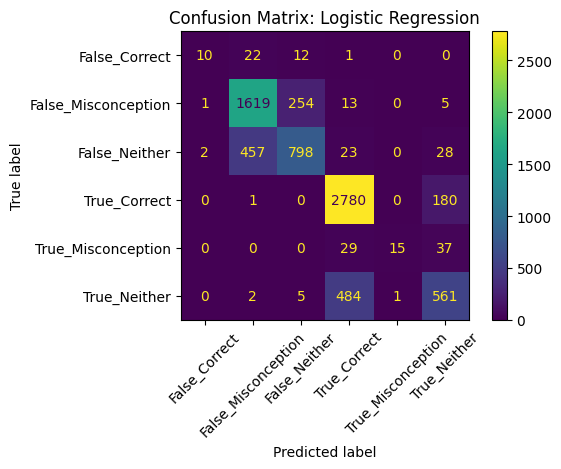


Model: Random Forest
                     precision    recall  f1-score   support

      False_Correct       0.84      0.36      0.50        45
False_Misconception       0.81      0.90      0.86      1892
      False_Neither       0.84      0.67      0.74      1308
       True_Correct       0.81      0.96      0.88      2961
 True_Misconception       0.76      0.20      0.31        81
       True_Neither       0.78      0.48      0.59      1053

           accuracy                           0.81      7340
          macro avg       0.81      0.59      0.65      7340
       weighted avg       0.81      0.81      0.80      7340



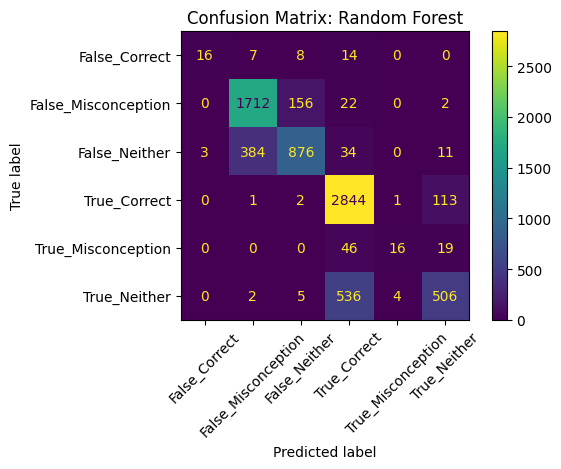


Model: SVM
                     precision    recall  f1-score   support

      False_Correct       0.73      0.24      0.37        45
False_Misconception       0.81      0.89      0.85      1892
      False_Neither       0.81      0.69      0.75      1308
       True_Correct       0.84      0.96      0.90      2961
 True_Misconception       0.94      0.19      0.31        81
       True_Neither       0.76      0.54      0.63      1053

           accuracy                           0.82      7340
          macro avg       0.82      0.58      0.63      7340
       weighted avg       0.82      0.82      0.81      7340



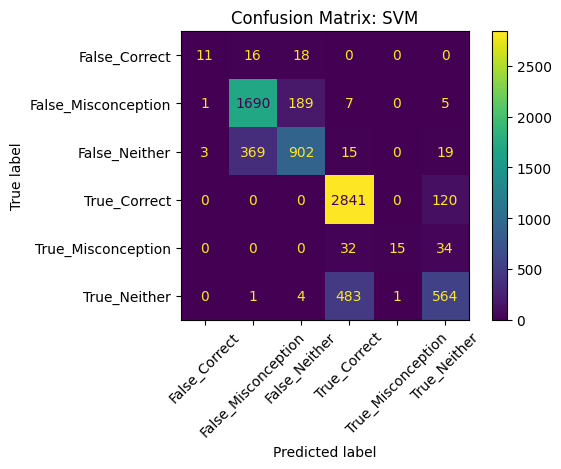


Model: XGBoost
                     precision    recall  f1-score   support

      False_Correct       0.88      0.33      0.48        45
False_Misconception       0.79      0.87      0.83      1892
      False_Neither       0.78      0.65      0.71      1308
       True_Correct       0.84      0.93      0.88      2961
 True_Misconception       0.74      0.28      0.41        81
       True_Neither       0.70      0.54      0.61      1053

           accuracy                           0.80      7340
          macro avg       0.79      0.60      0.65      7340
       weighted avg       0.79      0.80      0.79      7340



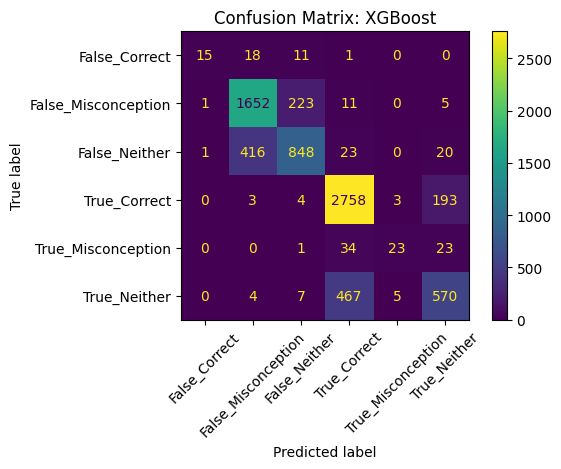

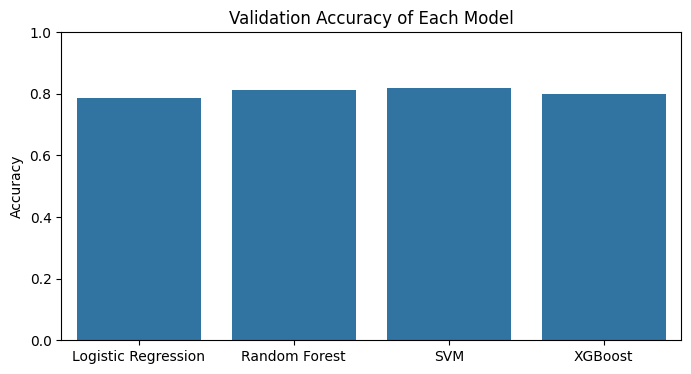

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 100}
Best accuracy: 0.8034812366694616
Model and label encoder saved!


In [12]:
# 📊 Student Explanation Classification – Advanced ML Pipeline
# ---------------------------------------------------------------

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings('ignore')

# 📥 Load Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

# 🧹 Data Preprocessing
train.dropna(subset=['StudentExplanation', 'MC_Answer', 'Category'], inplace=True)
X = train[['MC_Answer', 'StudentExplanation']].copy()
y = train['Category'].copy()

# 🔠 Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 📊 Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x=label_encoder.inverse_transform(y_encoded))
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔁 Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(), 'StudentExplanation'),
    ('mc', OneHotEncoder(handle_unknown='ignore'), ['MC_Answer'])
])

# 🤖 Define Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 🏁 Train & Evaluate Models
results = {}
for name, model in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_val, y_val)
    results[name] = score
    print(f"\nModel: {name}")
    y_pred = pipe.predict(X_val)
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))
    ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=label_encoder.classes_).plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📈 Accuracy Comparison
plt.figure(figsize=(8,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Validation Accuracy of Each Model")
plt.ylim(0, 1)
plt.show()

# 🔍 Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}

grid = GridSearchCV(Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier())]),
                    param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# 💾 Save the best model
best_model = grid.best_estimator_
joblib.dump(best_model, 'best_student_explanation_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Model and label encoder saved!")


In [ ]:
# 🔍 Load & Predict
print("\n Loading saved model and encoder for prediction...")
loaded_model = joblib.load('best_student_explanation_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# Example input for prediction
example_input = pd.DataFrame({
    'MC_Answer': ['\( \\frac{1}{3} \)'],
    'StudentExplanation': ['1 / 3 because 6 over 9 is 2 thirds and 1 third is not shaded.']
})

pred = loaded_model.predict(example_input)
pred_label = loaded_encoder.inverse_transform(pred)
print("\n Prediction result:", pred_label[0])


🔍 Loading saved model and encoder for prediction...

🧠 Prediction result: True_Correct
